1. 기본적인 항목 import

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2. tensorflow 데이터셋 : flower_photos 

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


3. train ,test, validation 데이터

In [6]:
batch_size = 32
img_height = 240
img_width = 240

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


4. 데이터셋 클래스 이름

In [7]:
class_name = train_ds.class_names
print(class_name)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


5. 데이터 시각화

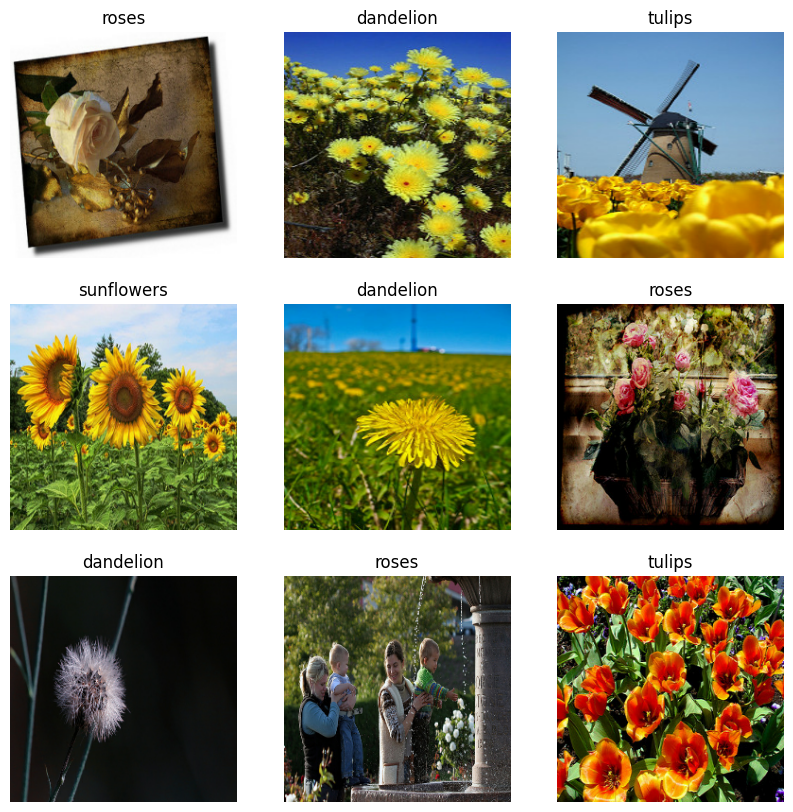

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])
    plt.axis("off")

6. 이미지 정보 검색

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 240, 240, 3)
(32,)


7. VGG16을 이용하여 백터로 변환

In [11]:
from tensorflow.keras.applications import VGG16

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(240, 240, 3))
vgg16.trainable = False

features = vgg16.predict(images)

print(features)

1/1 [==============================] - 3s 3s/step
[[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 3.70382476e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 2.45545540e+01]
   ...
   [0.0

8. 2차원으로 변환하기 위해 t-SNE를 사용

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(features.reshape(features.shape[0], -1))

print(tsne_features)

[[3.2840242 0.9325121]
 [3.574382  1.2063829]
 [3.4487207 1.1735473]
 [3.7309318 0.9516219]
 [3.604167  1.1817325]
 [3.5169342 1.2440429]
 [3.5782213 1.1723692]
 [3.031409  0.8102405]
 [3.711946  1.5465144]
 [3.544881  1.1792312]
 [3.4879398 1.2510961]
 [3.5160363 1.2078788]
 [3.5237153 0.8873   ]
 [3.508815  1.54568  ]
 [3.5342305 1.1705092]
 [3.5389285 1.1835395]
 [4.1324644 0.8929352]
 [3.46261   0.8509158]
 [3.8711557 1.145554 ]
 [3.75272   0.9033956]
 [3.7226734 1.1752622]
 [3.5218976 1.219843 ]
 [4.1006346 1.3293418]
 [3.1561668 1.7617674]
 [2.9732003 1.234046 ]
 [3.5531673 1.1552924]
 [3.4833593 1.1862696]
 [3.438983  1.208974 ]
 [3.5554333 1.2406212]
 [3.8622005 1.0537418]
 [3.7565424 1.6749974]
 [3.4068387 1.3237994]]


9. K-means를 이용하여 Clustering

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(tsne_features)

print(clusters)

[2 3 3 1 3 3 3 2 0 3 3 3 2 0 3 3 1 2 1 1 3 3 1 0 2 3 3 3 3 1 0 3]


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


10. 군집분석 결과 시각화

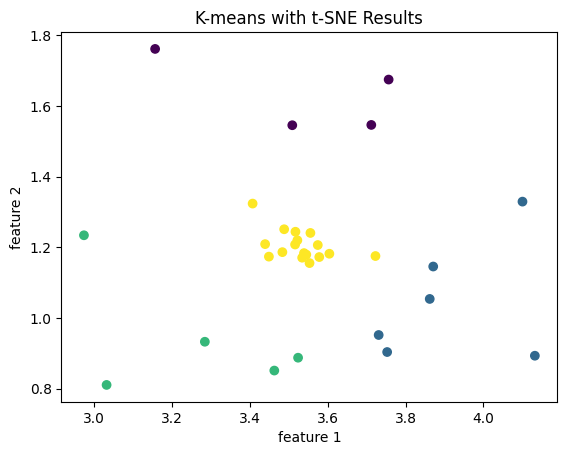

In [21]:
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=clusters)
plt.title("K-means with t-SNE Results")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()